In [68]:
# load the data

import os
import glob 
from matplotlib.pyplot import rc_context
import seaborn as sns
import numpy as np
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

import pickle  #upper threshold 값들을 저장하고 불러오기 위해서. 

In [69]:
# Load the stored data object
save_file = './write/ddk_ctrl.h5ad'
adata_ctrl = sc.read_h5ad(save_file)

# Load the stored data object
save_file = './write/ddk_ko.h5ad'
adata_ko = sc.read_h5ad(save_file)




In [70]:
adata_ctrl

AnnData object with n_obs × n_vars = 837 × 31056
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [71]:
adata_ko

AnnData object with n_obs × n_vars = 1146 × 31056
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [72]:
adata_ko.obs['sample'] = 'ko'

adata_ctrl.obs['sample'] = 'control'

In [73]:
adata = adata_ctrl.concatenate(adata_ko)

In [74]:
adata

AnnData object with n_obs × n_vars = 1983 × 31056
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'sample', 'batch'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1'

In [75]:
print(adata.obs['sample'].value_counts())


ko         1146
control     837
Name: sample, dtype: int64


In [76]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)


normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [77]:
sc.pp.log1p(adata)


In [78]:
# compute variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
print("Highly variable genes: %d"%sum(adata.var.highly_variable))


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Highly variable genes: 4892


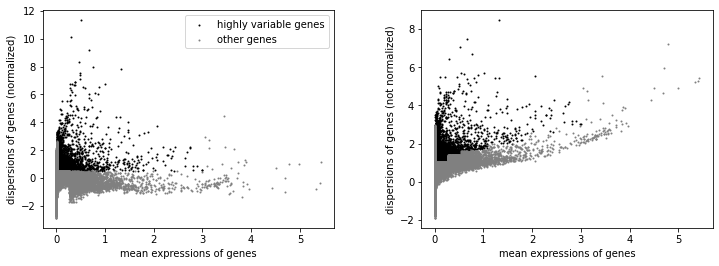

In [79]:
#plot variable genes
sc.pl.highly_variable_genes(adata)

In [80]:
# subset for variable genes in the dataset
adata = adata[:, adata.var['highly_variable']]

In [81]:

# scale data, clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/Users/minsuyoo/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [82]:
sc.tl.pca(adata, svd_solver='arpack')


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


... storing 'sample' as categorical


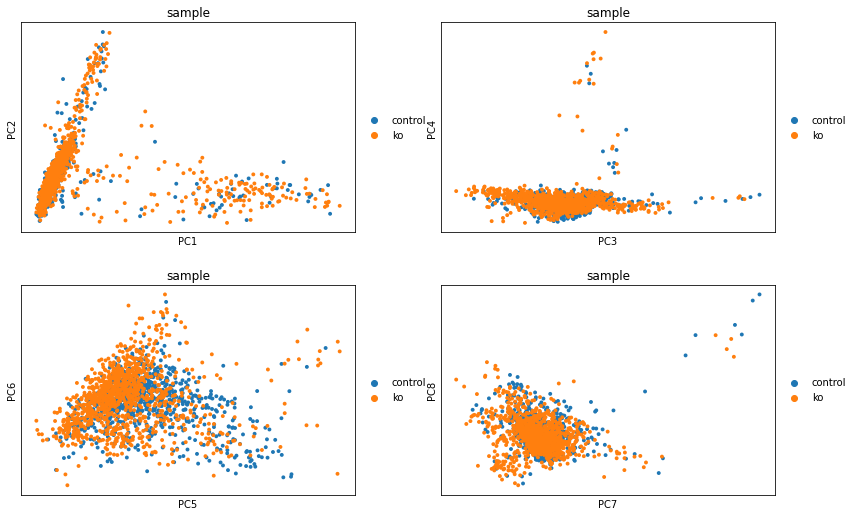

In [83]:
 #plot more PCS

sc.pl.pca(adata, color='sample', components = ['1,2','3,4','5,6','7,8'], ncols=2)

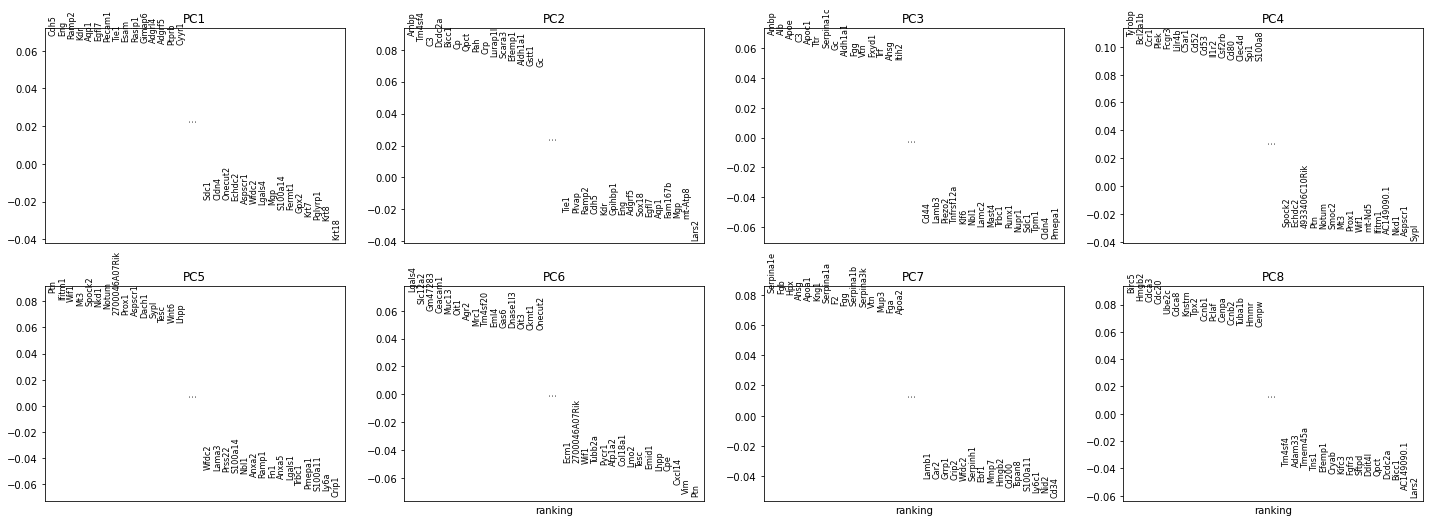

In [84]:
#Plot loadings
sc.pl.pca_loadings(adata, components=[1,2,3,4,5,6,7,8])

# OBS! only plots the positive axes genes from each PC!!

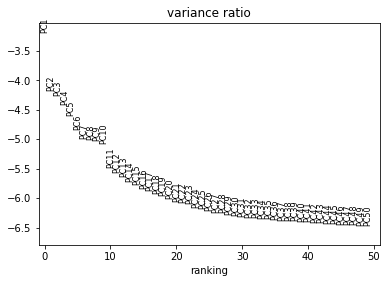

In [85]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)


In [86]:
sc.tl.tsne(adata, n_pcs = 30)


computing tSNE
    using 'X_pca' with n_pcs = 30
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:05)


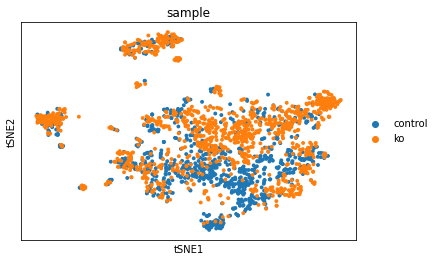

In [87]:
sc.pl.tsne(adata, color='sample')


In [88]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [89]:
sc.tl.leiden(adata)


running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [91]:
sc.pp.neighbors(adata, n_pcs = 30, n_neighbors = 20)


computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [92]:
sc.tl.umap(adata)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


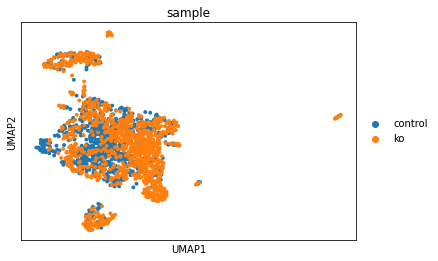

In [93]:
sc.pl.umap(adata, color='sample')


In [94]:
adata

AnnData object with n_obs × n_vars = 1983 × 4892
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'n_counts', 'sample', 'batch', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'sample_colors', 'tsne', 'neighbors', 'leiden', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [95]:
genes = adata.var['gene_ids']


In [67]:
if 'sd' in gene_names:
    print('yes')
else:
    print('no')


no


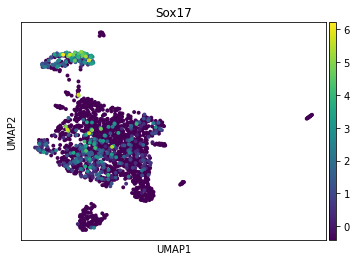

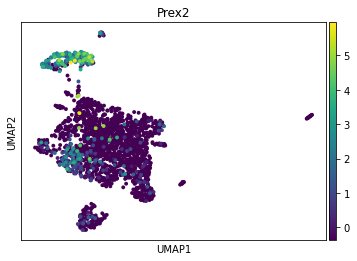

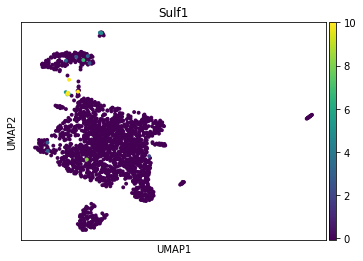

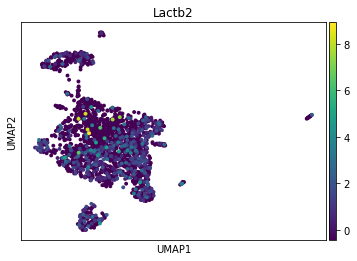

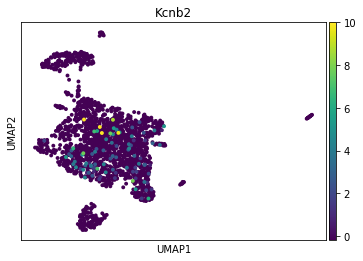

In [96]:
for gene_id in gene_names[:5]:
    sc.pl.umap(adata, color=gene_id)


In [97]:
sc.tl.leiden(adata)


running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


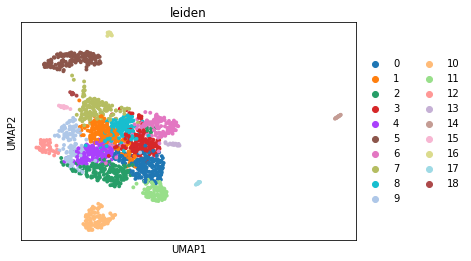

In [98]:
sc.pl.umap(adata, color=['leiden'], )


In [99]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


/Users/minsuyoo/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


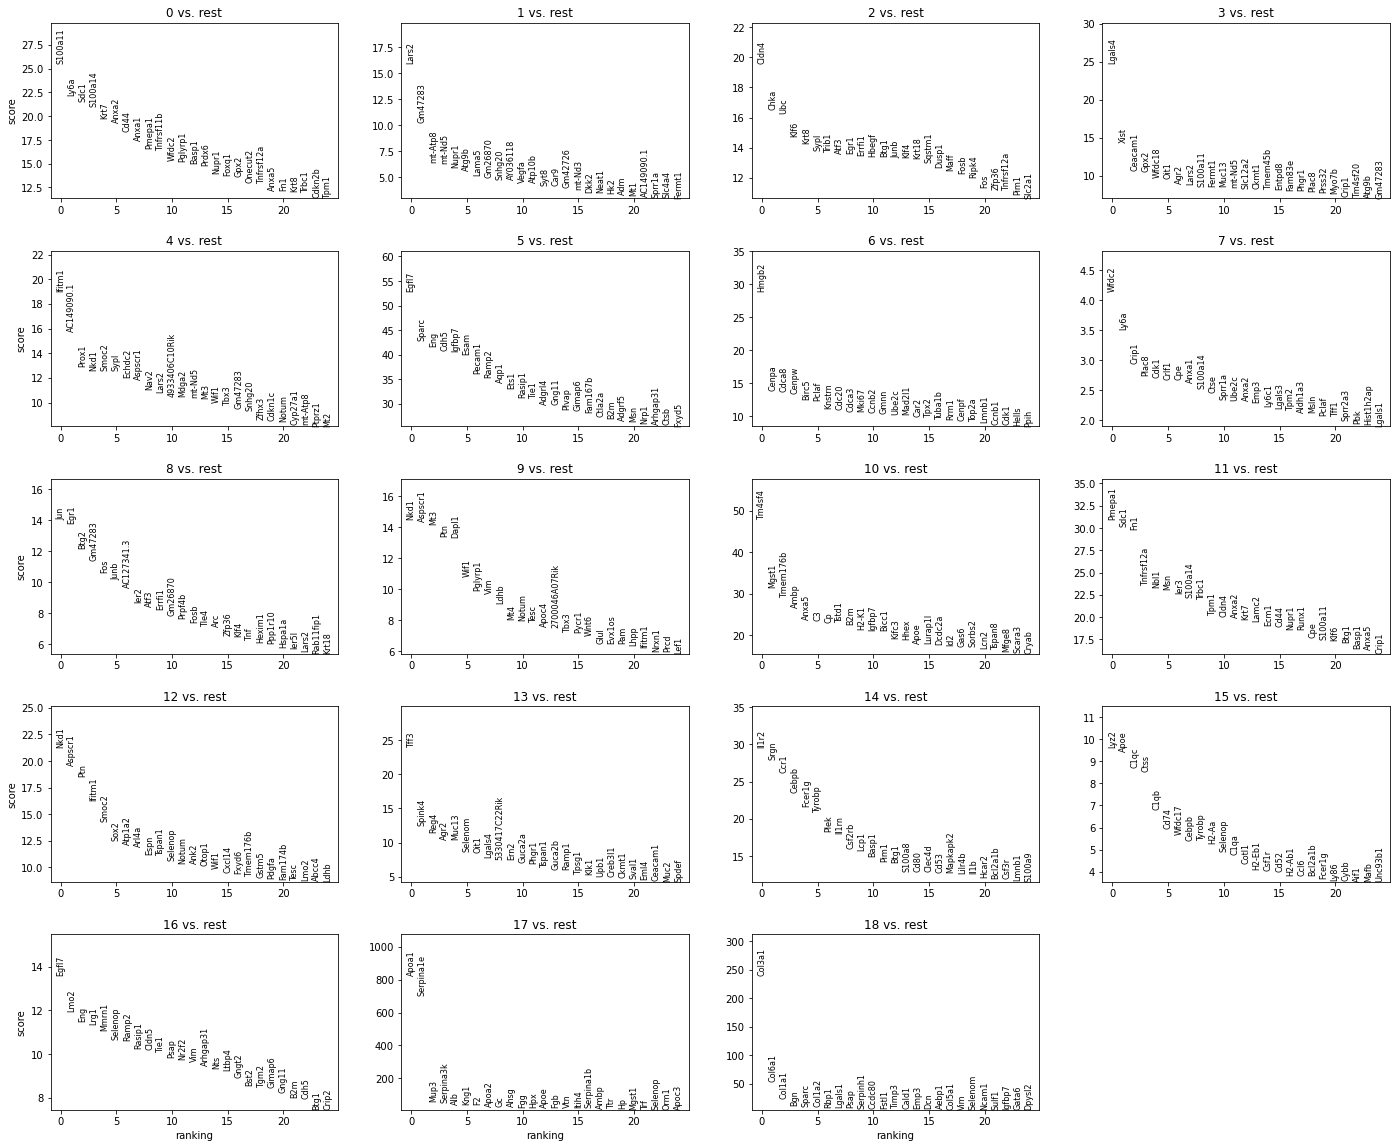

In [100]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)


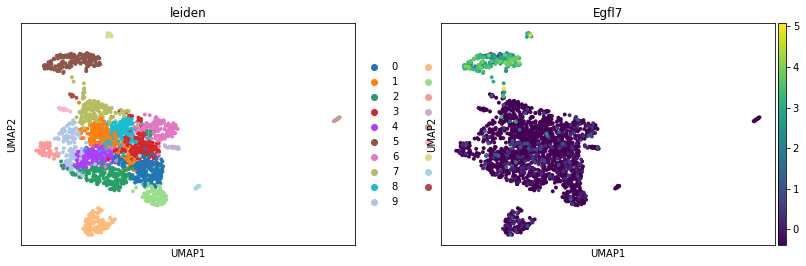

In [101]:
sc.pl.umap(adata, color=['leiden', 'Egfl7' ], )
